# Milestone 1
Building on previous exercises, build an interactive application that asks the user a series of questions and then stores the user's answers for later analysis.

## Requirements
Your submission should include the following:
- A Chatbot that asks three users a series of at least three questions.
- Your chatbot should store the user's responses in a data structure, preferably a Pandas DataFrame, so that it can present a graphical analysis of the responses.
- Your chatbot should provide at least one visualization, such as a vertical bar chart, that provides a basic summary and analysis of the user input.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class Bot:

    def __init__(self):

        self.path = "./chat_data.csv"
        self.data = None

        self.response = []
        self.read_chat()

    def read_chat(self):

        try:
            self.data = pd.read_csv(self.path)
        except FileNotFoundError:
            self.data = pd.DataFrame(columns=[
                "id",
                "name",
                "city",
                "pot_lover",
                "cat_num",
            ])

    def save_chat(self):

        index = len(self.data)
        self.data.loc[index] = {
            "id": index + 1,
            "name": self.response[0],
            "city": self.response[1],
            "pot_lover": self.response[2],
            "cat_num": self.response[3],
        }

        self.data.to_csv(self.path, index=False)

    def ask_question(self, info, alpha=False, num=False):

        answer = input(f"One question for you: {info}?")

        if num:
            if not answer.isdigit() or int(answer) < 0:
                print(f"Tell me about {info}. Come on!")
                return self.ask_question(info, alpha=False, num=True)

        if alpha:
            answer = answer.upper()
            if not answer.isalpha() or answer not in ['Y', 'YES', 'N', 'NO', 'MAYBE', 'N/A']:
                print(f"Tell me about {info}. You have options: Yes, No, Maybe.\n")
                return self.ask_question(info, alpha=True, num=False)
            else:
                if answer in ['Y', 'YES']:
                    answer = 1
                elif answer in ['N', 'NO']:
                    answer = 0
                else:
                    answer = 0.5
        
        self.response.append(int(answer) if num else answer)

    def conversation(self):

        escape = ["QUIT", "EXIT", "BYE", "STOP"]
        loop = True
        count = 0

        while loop:
            print(f"Bello! I'll ask you sae questions as a minion."
                #   f"You can quit by typing QUIT, EXIT, BYE, or STOP where possible."
            )
            self.ask_question('name')
            self.ask_question('city')
            self.ask_question('do you love potatoes', alpha=True)
            self.ask_question('how many cats do you have', num=True)

            self.save_chat()
            self.response = []
            count += 1
            loop = False if count >= 3 else True

            print(f"Tank yu! Let's switch to the next person. Poopaye!")

    def analysis(self):
        
        pot_lover = self.data['pot_lover'].value_counts()
        plt.subplot(211)
        pot_lover.plot.bar(rot=0)
        plt.title('Are you a potato lover?')
        
        cat_num = self.data['cat_num']
        plt.subplot(212)
        cat_num.plot.barh(rot=0)
        plt.xlabel('number of cats')
        plt.ylabel('number of people')
        plt.title('How many cats do you have?')

        plt.tight_layout()
        plt.show()

Bello! I'll ask you sae questions as a minion.
Tank yu! Let's switch to the next person. Poopaye!
Bello! I'll ask you sae questions as a minion.
Tank yu! Let's switch to the next person. Poopaye!
Bello! I'll ask you sae questions as a minion.
Tank yu! Let's switch to the next person. Poopaye!


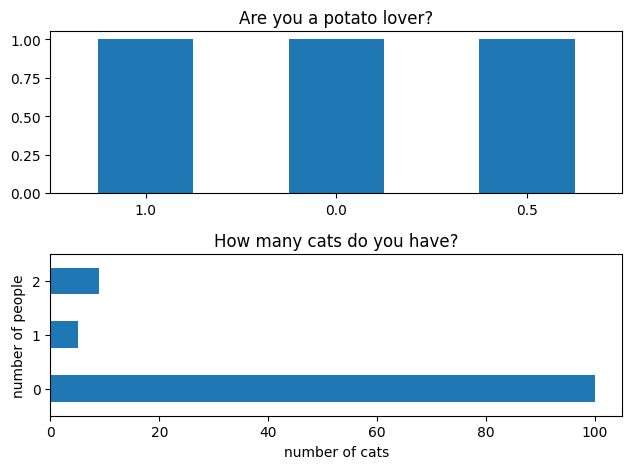

In [6]:
if __name__ == '__main__':

    chatbot = Bot()
    chatbot.conversation()
    chatbot.analysis()